<a href="https://colab.research.google.com/github/jaid247/Data-Analyst-Project/blob/main/Data_analysis_(Titanic_Dataset)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Data Analysis on a Dataset (Titanic Dataset)**


Objective: Analyze the Titanic dataset to understand the factors that impacted passenger survival.

Steps:
Import Required Libraries,
Load the Dataset,
Data Exploration,
Data Cleaning,
Exploratory Data Analysis (EDA),
Data Visualization,
Conclusion.


1. Import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


2. Load the Dataset

In [ ]:
# Load dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# Display the first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


3. Data Exploration

In [ ]:
# Checking the shape of the data
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking for null values
df.isnull().sum()

# Checking data types and summary
df.info()

# Statistical summary
df.describe()


Dataset contains 891 rows and 12 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Data Cleaning

In [ ]:
# Dropping irrelevant columns
df = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Fill missing Age with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Check again for missing data
df.isnull().sum()


<ipython-input-4-934d97fcde92>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-4-934d97fcde92>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


5. Exploratory Data Analysis (EDA)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


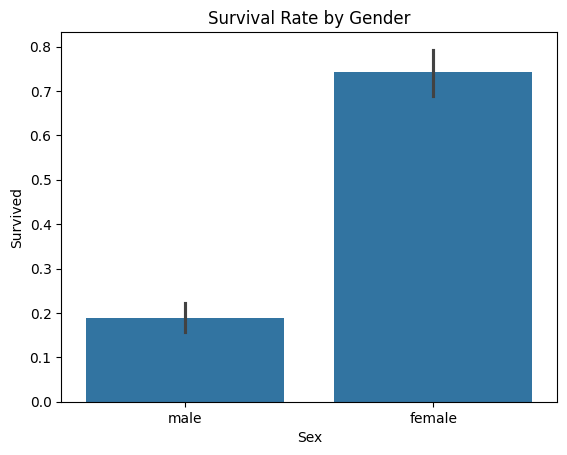

In [ ]:
# Grouping by gender and calculating survival rates
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_rate_by_gender)

# Visualize
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


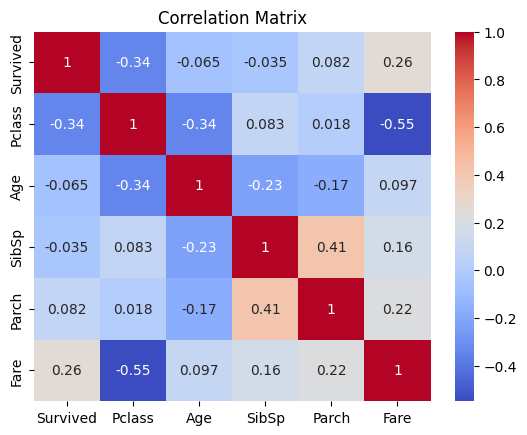

In [ ]:

# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

5.2 Survival Rate by Gender

5.3 Survival Rate by Class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


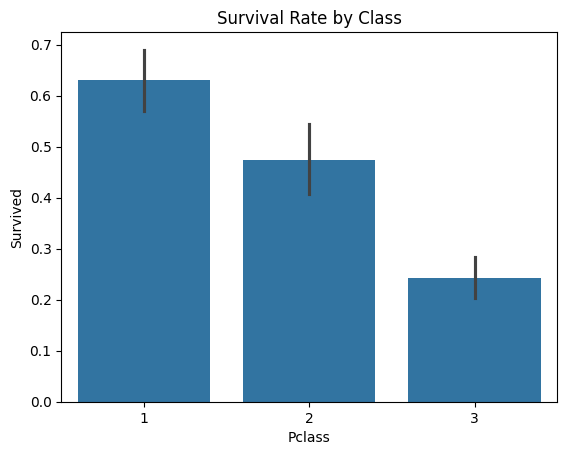

In [ ]:
# Grouping by Pclass and calculating survival rates
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_rate_by_class)

# Visualize
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.show()


5.4 Age Distribution

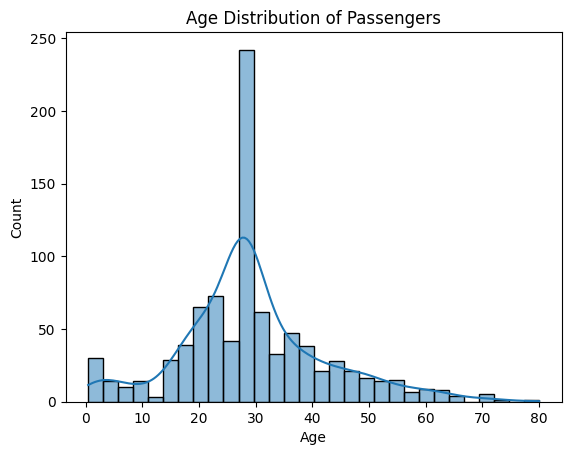

In [ ]:
# Distribution of ages
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution of Passengers')
plt.show()


5.5 Survival Rate by Age

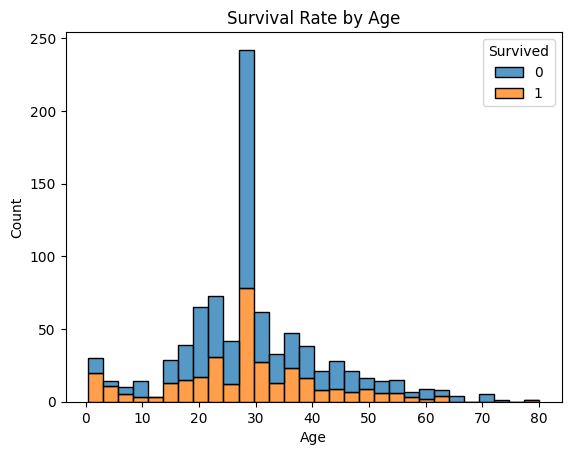

In [ ]:
# Survival rate across age groups
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', kde=False)
plt.title('Survival Rate by Age')
plt.show()


6. Data Visualization
We can also visualize survival rates based on multiple factors.

6.1 Survival Rate by Gender and Class

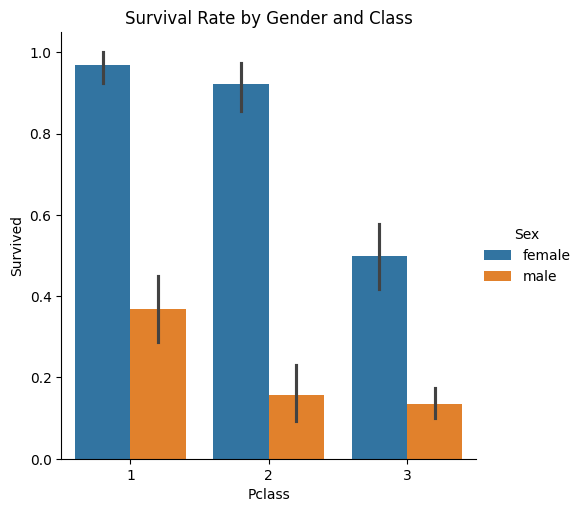

In [ ]:
# Plotting survival rate by both gender and class
sns.catplot(x='Pclass', y='Survived', hue='Sex', kind='bar', data=df)
plt.title('Survival Rate by Gender and Class')
plt.show()


6.2 Pair Plot

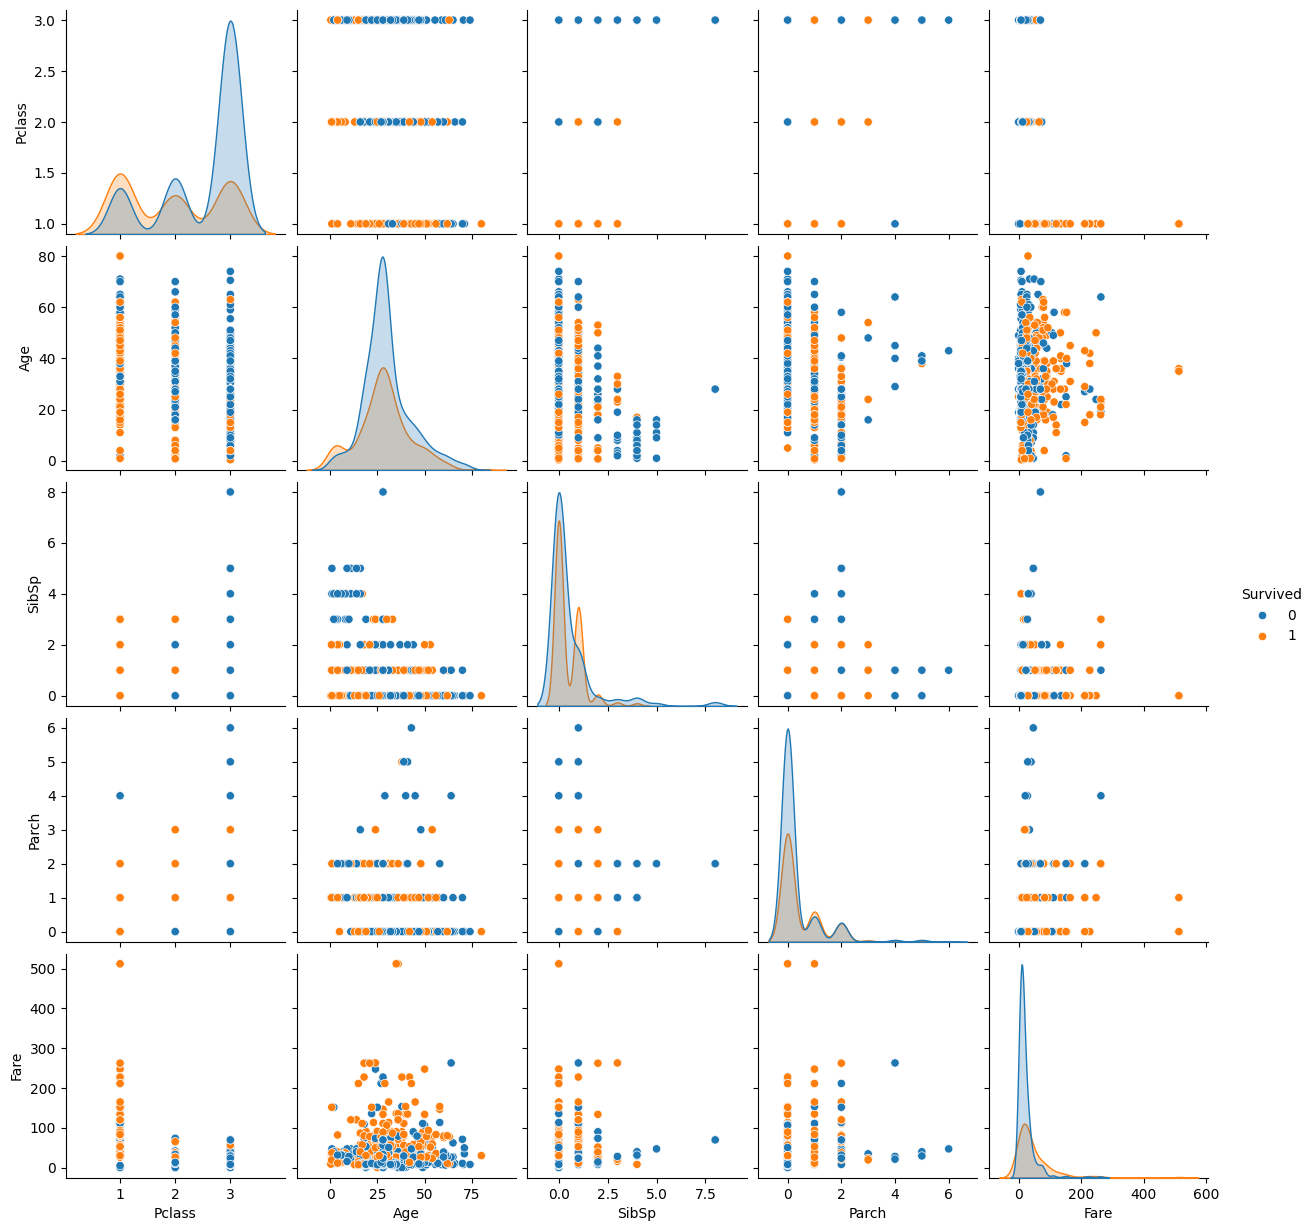

In [ ]:
# Pair plot to see relationships between numerical variables
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()


7. Conclusion
From the analysis, we can conclude:

Female passengers had a higher survival rate than males.
Passengers in higher classes (1st class) had a better chance of survival.
Younger passengers tended to survive more often than older ones.